In [1]:
import FHMM
import cPickle as pk
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/nelly/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [28]:
with open('predictions.pkl') as f:
    predictions = pk.load(f)

with open('test2.pkl') as f:
    test = pk.load(f)

In [85]:
Min15_pred = predictions.resample('15Min').sum()
Min15_test = test.resample('15Min').sum()

In [86]:
Min15_pred.head()

,channel_12,channel_5,channel_6
date,,,
2013-09-01 00:00:00,360.0,0.0,15.0
2013-09-01 00:15:00,507.0,0.0,122.0
2013-09-01 00:30:00,0.0,0.0,15.0
2013-09-01 00:45:00,957.0,0.0,15.0
2013-09-01 01:00:00,540.0,0.0,15.0


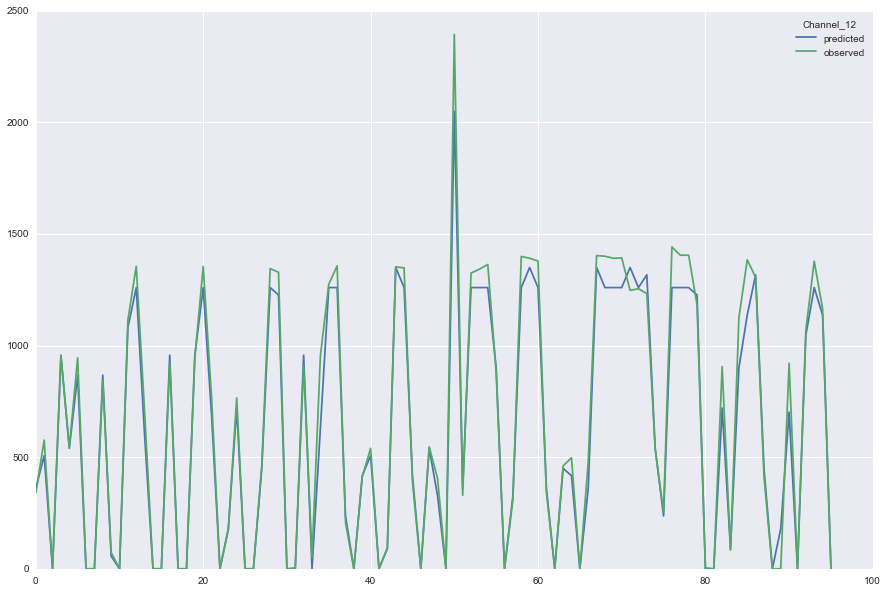

In [87]:
channel_12_pred = Min15_pred[['channel_12']]['2013-09-01'].values
channel_12_act = Min15_test[['channel_12']]['2013-09-01'].values
plt.figure(figsize = (15,10))
plt.plot(channel_12_pred, label = 'predicted')
plt.plot(channel_12_act, label = 'observed')
plt.legend(title = 'Channel_12');

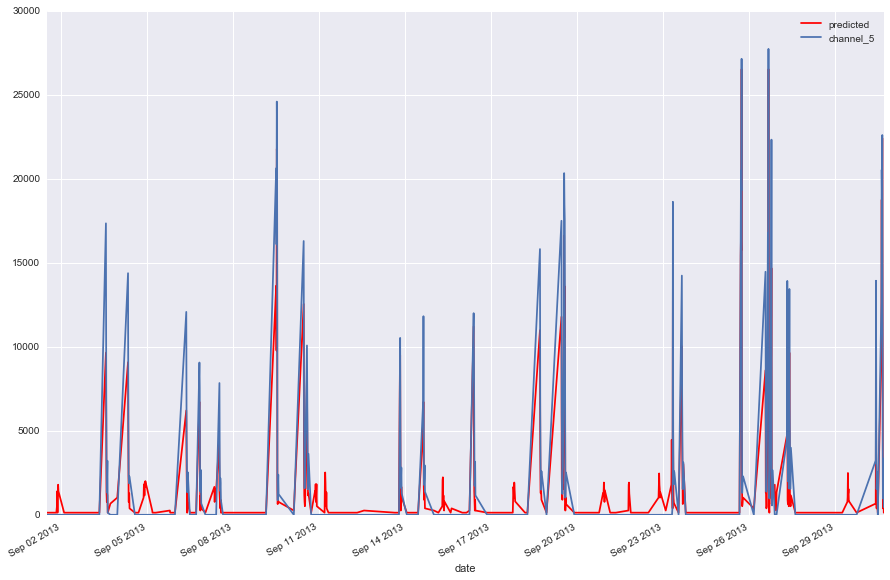

In [88]:
channel = 'channel_5'
channel_pred = Min15_pred[(Min15_pred[channel]>1)][channel]
idx = channel_pred.index
channel_act = Min15_test.loc[idx][[channel]]


plt.figure(figsize = (15,10))
ax = channel_pred.plot(label = 'predicted',color = 'red')
channel_act.plot(ax = ax, label = 'observed')
plt.legend();

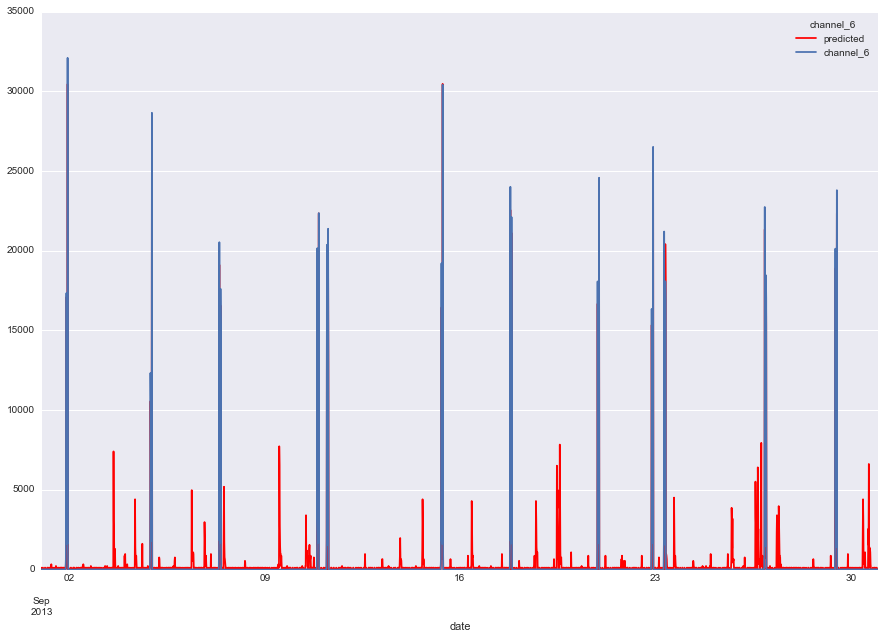

In [89]:
channel = 'channel_6'
channel_pred = Min15_pred[(Min15_pred[channel]>1)][channel]
idx = channel_pred.index
channel_act = Min15_test.loc[idx][[channel]]


plt.figure(figsize = (15,10))
ax = channel_pred.plot(label = 'predicted',color = 'red')
channel_act.plot(ax = ax, label = 'observed')
plt.legend(title = channel);

# plt.plot(channel_5_pred_working, label = 'predicted')
# plt.plot(channel_5_act_working, label = 'observed')
# plt.legend(title = 'Channel_5');

In [91]:
hourly_samples = test.resample('120Min').sum()['2013-09-01':'2013-09-08']
hourly_samples['hour'] = hourly_samples.index.hour
hourly_samples['day'] = hourly_samples.index.date
hourly_samples.head()

,channel_12,channel_5,channel_6,total,hour,day
date,,,,,,
2013-09-01 00:00:00,3361.874603,0.0,120.000,3481.874603,0,2013-09-01
2013-09-01 02:00:00,4088.323413,0.0,120.250,4208.573413,2,2013-09-01
2013-09-01 04:00:00,4168.015873,0.0,120.375,4288.390873,4,2013-09-01
2013-09-01 06:00:00,3907.228175,0.0,120.000,4027.228175,6,2013-09-01
2013-09-01 08:00:00,5165.802778,0.0,120.000,5285.802778,8,2013-09-01


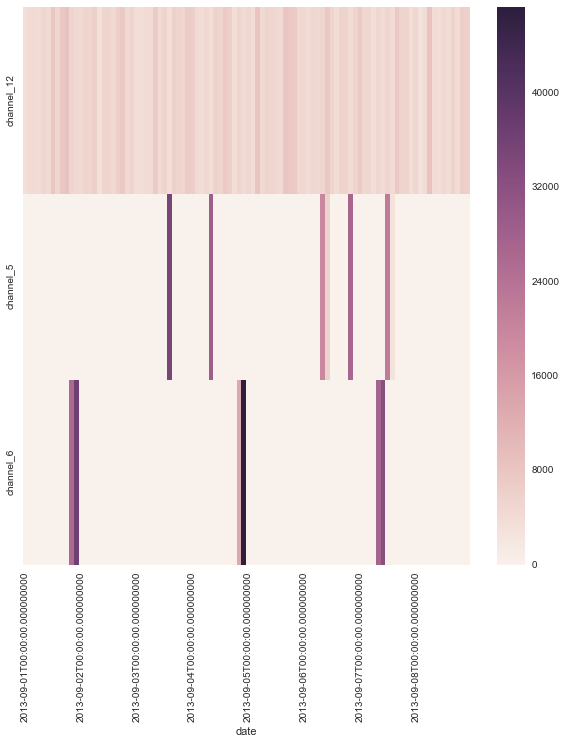

In [92]:
fig = plt.figure(figsize = (10,10))
ax = sns.heatmap(hourly_samples[['channel_12','channel_5','channel_6']].T,xticklabels = 12)